# Partie 1 : Chargement des données

In [9]:
# Importation des librairies nécessaires
from tensorflow.keras.datasets import mnist  # Pour charger le dataset MNIST
import matplotlib.pyplot as plt  # Pour afficher les images
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [2]:
# Chargement du dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

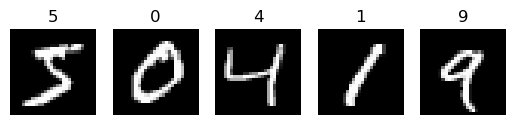

In [3]:
# Afficher quelques images avec leurs étiquettes
for i in range(5):  # Afficher 5 exemples
    plt.subplot(1, 5, i + 1)  # Créer une figure avec 1 ligne et 5 colonnes
    plt.imshow(x_train[i], cmap='gray')  # Afficher l'image en niveaux de gris
    plt.title(y_train[i])  # Ajouter le label en titre
    plt.axis('off')  # Supprimer les axes pour une meilleure lisibilité
plt.show()

# Partie 2 : Préparation des données 

In [4]:
# Normalisation des pixels
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Reshape des données pour inclure la dimension des canaux
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Partie 3 : Construction du modèle (CNN) 

In [12]:
# Création et compilation du modèle
model = Sequential([
    Input(shape=(28, 28, 1)),  # Spécification de la forme d'entrée
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
# Compilation
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# Partie 4 : Entrainement du model

In [16]:
# Entraînement du modèle avec validation sur x_test et y_test
history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.8935 - loss: 0.3339 - val_accuracy: 0.9843 - val_loss: 0.0462
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9843 - loss: 0.0480 - val_accuracy: 0.9855 - val_loss: 0.0465
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9898 - loss: 0.0316 - val_accuracy: 0.9870 - val_loss: 0.0436
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9921 - loss: 0.0243 - val_accuracy: 0.9884 - val_loss: 0.0371
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9955 - loss: 0.0152 - val_accuracy: 0.9906 - val_loss: 0.0321
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9967 - loss: 0.0102 - val_accuracy: 0.9907 - val_loss: 0.0333
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9979 -

# Partie 5 : Évaluation du Modèle

In [18]:
# Évaluation du modèle sur le jeu de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Affichage de la précision
print(f"Précision du modèle sur les données de test : {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9874 - loss: 0.0487
Précision du modèle sur les données de test : 0.99


# Partie 6 : Visualisation

In [19]:
import matplotlib.pyplot as plt

# Extraction des métriques d'entraînement et de validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

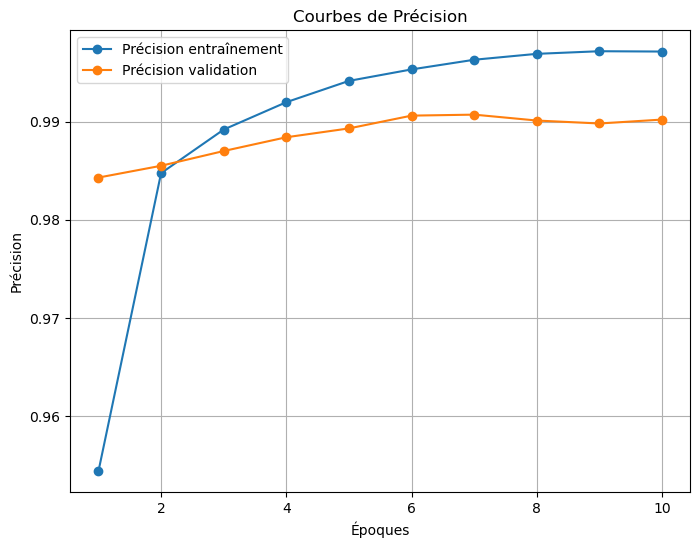

In [20]:
# Tracer les courbes
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, label='Précision entraînement', marker='o')
plt.plot(epochs, val_accuracy, label='Précision validation', marker='o')
plt.title("Courbes de Précision")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()
plt.grid(True)
plt.show()